# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo


# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


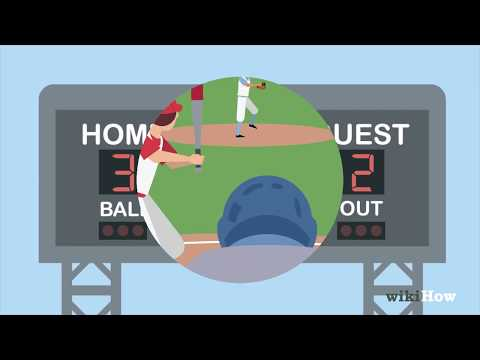

In [43]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [44]:
# Load dataframes
path = 'data/baseballdatabank-2023/'
salaries = pd.read_csv(path+'contrib/Salaries.csv')
people = pd.read_csv(path+'core/People.csv')
pitching = pd.read_csv(path+'core/Pitching.csv')

In [45]:
# Filter for data up to the year 2010 (inclusive).
salaries_before_2010 = salaries[salaries['yearID'] <= 2010].copy()
pitching_before_2010 = pitching[pitching['yearID'] <= 2010].copy()

# Check solution
assert(all(salaries_before_2010['yearID'] <= 2010))
assert(all(pitching_before_2010['yearID'] <= 2010))

In [46]:
# Drop all duplicate salaries for players in a given year, keeping only the first instance
salaries_no_duplicates = salaries_before_2010.drop_duplicates(['playerID', 'yearID'], keep='first').copy()

# Check solution
assert(all(salaries_no_duplicates.groupby(['playerID', 'yearID'])['salary'].count() == 1))

In [47]:
# Calculate the sizes of the dataframes
print("Salaries: ", salaries_no_duplicates.size)
print("People: ", people.size)
print("Pitching: ", pitching_before_2010.size)

Salaries:  106755
People:  496224
Pitching:  1212990


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [48]:
# Filter for "L" and "R" throws
people_defined_throws = people[(people['throws'] == "L") | (people['throws'] == "R")].copy()
print("Values in the throws column: ", people_defined_throws['throws'].unique())

Values in the throws column:  ['R' 'L']


**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [49]:
# Perform an outer merge on the playerID column. 
pitching_people = pitching_before_2010.merge(people_defined_throws, 'outer').copy()
display(pitching_people)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,bechtge01,1871.0,1.0,PH1,NaN,1.0,2.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bechtge01,1873.0,1.0,PH2,NaN,0.0,2.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bechtge01,1874.0,1.0,PH2,NaN,1.0,3.0,6.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bechtge01,1875.0,1.0,PH3,NaN,2.0,12.0,14.0,14.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bechtge01,1875.0,2.0,PH1,NaN,3.0,1.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51931,zupcibo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zupcic,Robert,220.0,76.0,R,R,1991-09-07,1994-08-04,zupcb001,zupcibo01
51932,zupofr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
51933,zuvelpa01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
51934,zwilldu01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

Percentage of what? We need to find an interpretable primary key : A minimal set of columns which uniquely specify a row.

In [50]:
# Removing any of the three columns in the index will throw in an exception
pitching_people.set_index(['playerID', 'yearID', 'stint'], verify_integrity=True).head()

teamID lgID    W     L     G    GS    CG  SHO   SV  \
playerID  yearID stint                                                      
bechtge01 1871.0 1.0      PH1  NaN  1.0   2.0   3.0   3.0   2.0  0.0  0.0   
          1873.0 1.0      PH2  NaN  0.0   2.0   3.0   2.0   1.0  0.0  0.0   
          1874.0 1.0      PH2  NaN  1.0   3.0   6.0   4.0   4.0  0.0  0.0   
          1875.0 1.0      PH3  NaN  2.0  12.0  14.0  14.0  14.0  0.0  0.0   
                 2.0      PH1  NaN  3.0   1.0   4.0   4.0   4.0  0.0  0.0   

                        IPouts  ...  nameLast  nameGiven  weight  height  \
playerID  yearID stint          ...                                        
bechtge01 1871.0 1.0      78.0  ...       NaN        NaN     NaN     NaN   
          1873.0 1.0      48.0  ...       NaN        NaN     NaN     NaN   
          1874.0 1.0     117.0  ...       NaN        NaN     NaN     NaN   
          1875.0 1.0     378.0  ...       NaN        NaN     NaN     NaN   
                 2.0     108.0  ...       NaN        NaN     NaN     NaN   

                        bats  throws  debut  finalGame  retroID  bbrefID  
playerID  yearID stint                                                    
bechtge01 1871.0 1.0     NaN     NaN    NaN        NaN      NaN      NaN  
          1873.0 1.0     NaN     NaN    NaN        NaN      NaN      NaN  
          1874.0 1.0     NaN     NaN    NaN        NaN      NaN      NaN  
          1875.0 1.0     NaN     NaN    NaN        NaN      NaN      NaN  
                 2.0     NaN     NaN    NaN        NaN      NaN      NaN  

[5 rows x 50 columns]

So we verified that a salary is uniquely given by a player's stint in a given year.

In [51]:
def percentage_missing_data_by(df, column1, column2):
    """
    Takes a pandas dataframe and returns the percentage of missing data in column1 for
    each unique value in column 2.
    """
    missing_data_count = df.groupby(column2)[column1].count().copy()
    total_data_count = df[column2].value_counts()
    return 1-missing_data_count / total_data_count

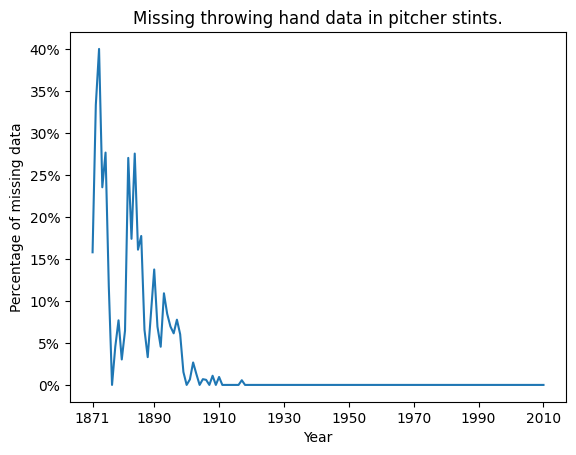

In [52]:
# Compute the percentage of missing "throws" data per year
first_year = min(pitching_people['yearID'])
percentage_missing_throw_data_by_year = percentage_missing_data_by(pitching_people, 'throws', 'yearID')

# Plot data
ax = percentage_missing_throw_data_by_year.plot(
    title="Missing throwing hand data in pitcher stints.",
    xlabel="Year", ylabel="Percentage of missing data",
    xticks=[first_year] + list(range(1890, 2011, 20)))
_ = ax.set_yticks(ax.get_yticks()[1:-1], labels=[str(int(p*100))+'%' for p in ax.get_yticks()][1:-1])

In [53]:
# Looking into 1892
print("The percentage of throw data missing in 1892 is : ", percentage_missing_throw_data_by_year[1892])

The percentage of throw data missing in 1892 is :  0.045454545454545414


**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [54]:
def after_1920(df):
    """
    Takes a dataframe with a yearID column and returns a filtered copy 
    containing only data that's defined and after 1920 (inclusive).
    """
    return df[(df['yearID'] >= 1920) & (~df['yearID'].isna())].copy()

pitching_people_after_1920 = after_1920(pitching_people)
salaries_after_1920 = after_1920(salaries_no_duplicates)

# Check for correctness
assert(all(salaries_after_1920['yearID'] >= 1920))
assert(all(pitching_people_after_1920['yearID'] >= 1920))

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [55]:
pitching_salaries = pitching_people_after_1920.merge(salaries_after_1920, how='outer').copy()
display(pitching_salaries)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,altroni01,1924.0,1.0,WS1,AL,0.0,0.0,1.0,0.0,0.0,...,Nicholas,197.0,70.0,B,L,1898-07-14,1933-10-01,altrn101,altroni01,NaN
1,bendech01,1925.0,1.0,CHA,AL,0.0,0.0,1.0,0.0,0.0,...,Charles Albert,185.0,74.0,R,R,1903-04-20,1925-07-21,bendc101,bendech01,NaN
2,wilheka01,1921.0,1.0,PHI,NL,0.0,0.0,4.0,0.0,0.0,...,Irvin Key,162.0,72.0,R,R,1903-04-18,1921-08-26,wilhk101,wilheka01,NaN
3,cicoted01,1920.0,1.0,CHA,AL,21.0,10.0,37.0,35.0,28.0,...,Edgar Victor,175.0,69.0,B,R,1905-09-03,1920-09-26,cicoe101,cicoted01,NaN
4,leifile01,1920.0,1.0,SLA,AL,0.0,0.0,4.0,0.0,0.0,...,Albert Peter,165.0,73.0,L,L,1905-09-03,1920-09-24,leifl101,leifile01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45747,rodriiv01,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000000.0
45748,wangch01,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0
45749,willijo03,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4600000.0
45750,zimmejo01,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


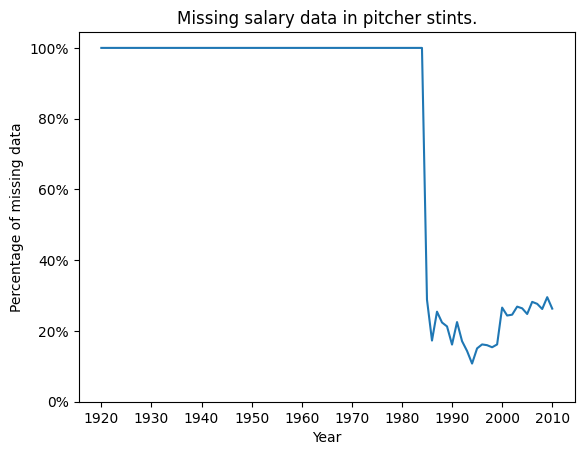

In [56]:
# Extract percentage of missing salary data per year.
percentage_missing_salary_data_by_year = percentage_missing_data_by(pitching_salaries, 'salary', 'yearID')

# Plot data
ax = percentage_missing_salary_data_by_year.plot(
    title="Missing salary data in pitcher stints.", 
    xlabel="Year", ylabel="Percentage of missing data",
    xticks=list(range(1920, 2011, 10)))
_ = ax.set_yticks(ax.get_yticks()[:-1], labels=[str(int(p*100))+'%' for p in ax.get_yticks()][:-1])

In [57]:
# Looking into 2002
print("The percentage of salary data missing in 2002 is : ", percentage_missing_salary_data_by_year[2002])

The percentage of salary data missing in 2002 is :  0.2459893048128342


**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [58]:
# Indeed, this makes sense because salaries are only available after this year
first_salary_year = salaries_after_1920['yearID'].min()
last_salary_year = salaries_after_1920['yearID'].max()
print("Earliest salary data :", first_salary_year)
print("Latest salary data :", last_salary_year)

Earliest salary data : 1985
Latest salary data : 2010


In [59]:
# Filter the dataframe to include only data between first and year with salary data (inclusive)
available_period_selector = (pitching_salaries['yearID'] >= first_salary_year) & (pitching_salaries['yearID'] <= last_salary_year)
salaries_when_available = pitching_salaries[available_period_selector].copy()
display(salaries_when_available)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
12022,johnto01,1985.0,1.0,CAL,AL,2.0,4.0,12.0,6.0,0.0,...,Thomas Edward,180.0,75.0,R,L,1963-09-06,1989-05-25,johnt001,johnto01,NaN
12023,johnto01,1985.0,2.0,OAK,AL,2.0,6.0,11.0,11.0,0.0,...,Thomas Edward,180.0,75.0,R,L,1963-09-06,1989-05-25,johnt001,johnto01,600000.0
12024,johnto01,1986.0,1.0,NYA,AL,5.0,3.0,13.0,10.0,1.0,...,Thomas Edward,180.0,75.0,R,L,1963-09-06,1989-05-25,johnt001,johnto01,NaN
12025,johnto01,1987.0,1.0,NYA,AL,13.0,6.0,33.0,33.0,3.0,...,Thomas Edward,180.0,75.0,R,L,1963-09-06,1989-05-25,johnt001,johnto01,350000.0
12026,johnto01,1988.0,1.0,NYA,AL,9.0,8.0,35.0,32.0,0.0,...,Thomas Edward,180.0,75.0,R,L,1963-09-06,1989-05-25,johnt001,johnto01,375000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45747,rodriiv01,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000000.0
45748,wangch01,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0
45749,willijo03,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4600000.0
45750,zimmejo01,2010.0,NaN,WAS,NL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [60]:
# PROVIDED CODE
df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

Some important assumptions to check
1. Whether a pitcher changes throwing hand at all
2. There is no NaN throw data
3. What the start-end dates are
4. Whether the first stint is always 1

In [61]:
# Check that the dataset only has left or right-handed pitchers
assert(all(df['throws'].unique() == ['R', 'L']))

# Mark out the right-handed player-year-stints
throw_r = df['throws']=='R'

# Verify that pitchers don't change throwing-hand
assert(len(set(df[throw_r]['playerID']) & set(df[~throw_r]['playerID']))==0)

# Check the start and end dates
first_salary_year = min(df['yearID'])
last_salary_year = max(df['yearID'])
print("Start date :", first_salary_year, "\tEnd date :", last_salary_year)

# Check - the "stint" does not always start from 1 for a given player and year
stint_one_players = df[df['stint']==1]['playerID']
no_stint_one_players = df[df['stint']>1]['playerID'].where(lambda x: ~x.isin(stint_one_players)).dropna()

display(df[df['playerID'].isin(no_stint_one_players)])

Start date : 1985 	End date : 2010


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
6272,morriji01,1988,2,ATL,NL,0,0,3,0,0,...,James Forrest,175.0,71.0,R,R,1977-09-18,1988-09-28,morrj002,morriji01,277500.0
10470,cirilje01,2007,2,ARI,NL,0,0,1,0,0,...,Jeffrey Howard,190.0,74.0,R,R,1994-05-11,2007-09-30,cirij001,cirilje01,1500000.0
13350,aldremi01,1996,2,NYA,AL,0,0,1,0,0,...,Michael Peter,180.0,71.0,L,L,1986-05-28,1996-09-29,aldrm001,aldremi01,250000.0


With this understanding we can move on with the task.

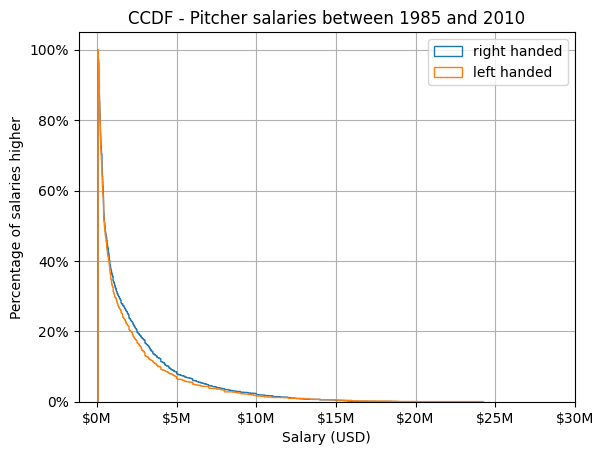

In [62]:
# Extract salaries for stints by right-throwing and left-throwing pitchers
r_salaries = df[df['salary'].notna()]['salary'][throw_r].copy()
l_salaries = df[df['salary'].notna()]['salary'][~throw_r].copy()

# Plot CCDF
ccdf_args = {'cumulative':-1, 'density':1, 'histtype':'step'}
r_salaries.hist(bins=len(r_salaries), label="right handed", **ccdf_args)
l_salaries.hist(bins=len(l_salaries), label="left handed", **ccdf_args)

plt.title(f"CCDF - Pitcher salaries between {first_salary_year} and {last_salary_year}")

# Format salaries as millions of dollars
plt.xlabel('Salary (USD)')
plt.xticks(plt.xticks()[0][1:], ["${:.0f}M".format(tick / 1e6) for tick in plt.xticks()[0]][1:])

# Format probabilites as percentages
plt.ylabel('Percentage of salaries higher')
plt.yticks(plt.yticks()[0][:-1], ["{:.0f}%".format(tick * 100) for tick in plt.yticks()[0]][:-1])
plt.legend()
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

**The issue**. The upper salary ranges are so sparse that it's hard to see what percentage of salaries earned are above a given amount.

**The solution**. We rescale the x axis to a logarithmic distribution, so that the higher salary ranges are emphasized.


**2.3 —** Implement the solution proposed by yourself in the previous question.

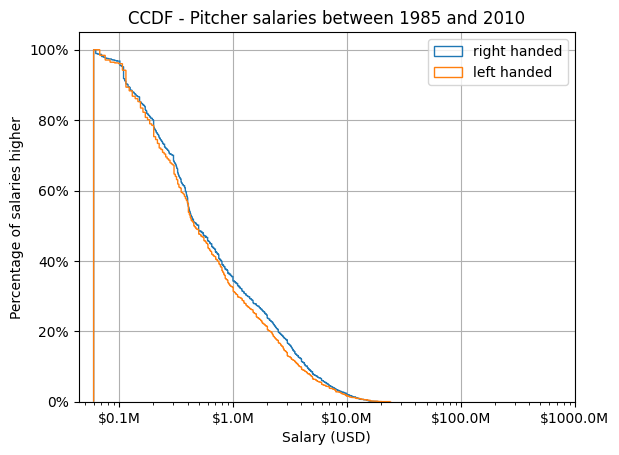

In [63]:
r_salaries.hist(bins=len(r_salaries), label="right handed", **ccdf_args)
l_salaries.hist(bins=len(l_salaries), label="left handed", **ccdf_args)

plt.title(f"CCDF - Pitcher salaries between {first_salary_year} and {last_salary_year}")

# Format salaries as millions of dollars
plt.xlabel('Salary (USD)')
plt.xscale('log')
plt.xticks(plt.xticks()[0][2:], ["${:.1f}M".format(tick / 1e6) for tick in plt.xticks()[0]][2:])

# Format probabilites as percentages
plt.ylabel('Percentage of salaries higher')
plt.yticks(plt.yticks()[0][:-1], ["{:.0f}%".format(tick * 100) for tick in plt.yticks()[0]][:-1])
plt.legend()
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

First of all, there are multiple issues with the data analysis.

1. **The data is cumulated over a long period of time.** We do not control for inflation.
2. **The dataset is unbalanced (1).** There are more salaries earned by right-handed people than left-handed.
3. **The dataset is unbalanced (2).** Some players play for longer than others or do more stints within a year than others.
4. **The plot is misleading.** The plot leads you to believe that the average right-handed player earns more than the average left-handed player, which has not yet been established.

Nevertheless, the plot shows that for **most** salary levels $S$, right-handed salaries $R$ are very slightly more likely than left-handed salaries $T$ to be higher than $S$.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

We do not assume that the mean is distributed in a theoretically nice way, so we employ SciPy's bootstrap estimation.

In [64]:
# For non-parametric confidence interval estimation with "percentile" procedure
from scipy.stats import bootstrap, ttest_ind

In [65]:
# Use the bootstrapping procedure described in the lectures.
bootstrap_args = {'statistic':np.mean, 'confidence_level':0.95, 'alternative':'two-sided', 'method':'percentile'}
r_strap_res = bootstrap([r_salaries], n_resamples=len(r_salaries), **bootstrap_args)
l_strap_res = bootstrap([l_salaries], n_resamples=len(l_salaries), **bootstrap_args)

In [66]:
r_strap_res

BootstrapResult(confidence_interval=ConfidenceInterval(low=1540960.4955697078, high=1655243.6061954866), bootstrap_distribution=array([1684505.13235498, 1614872.98144815, 1596171.13830818, ...,
       1593147.22663713, 1570212.09815866, 1553701.05496331]), standard_error=29337.30858887634)

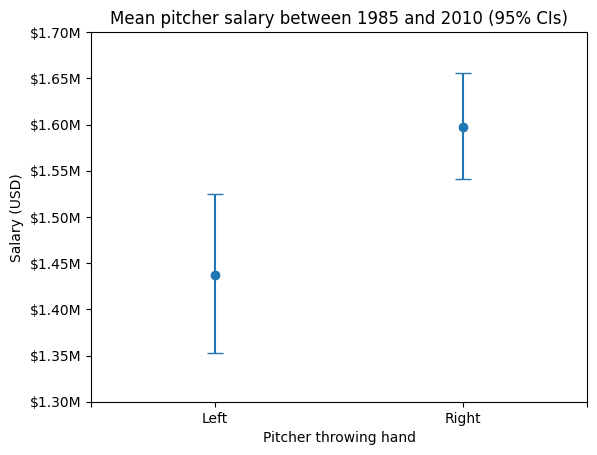

In [67]:
# Extract 95% confidence intervals
r_mean_ci, r_mean = r_strap_res.confidence_interval, np.mean(r_salaries)
l_mean_ci, l_mean = l_strap_res.confidence_interval, np.mean(l_salaries)
confidence = [[l_mean-l_mean_ci.low, r_mean-r_mean_ci.low], [l_mean_ci.high-l_mean, r_mean_ci.high-r_mean]]
# Plot estimates of means with confidence intervals
plt.errorbar(x=[0.25, 0.75], y=[l_mean, r_mean], yerr=confidence, fmt='o', capsize=6)
plt.title(f"Mean pitcher salary between {first_salary_year} and {last_salary_year} (95% CIs)")
plt.xlabel("Pitcher throwing hand")
plt.xticks(ticks=[0, 0.25, 0.75, 1], labels=["", "Left", "Right", ""])
plt.ylabel('Salary (USD)')
plt.yticks(plt.yticks()[0], ["${:.2f}M".format(tick / 1e6) for tick in plt.yticks()[0]])
plt.show()

In [68]:
print(r_mean_ci.low, r_mean, r_mean_ci.high)
print(l_mean_ci.low, l_mean, l_mean_ci.high)

1540960.4955697078 1597010.1359545896 1655243.6061954866
1352302.0920410156 1437232.861328125 1524575.20008138


**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

When the CIs don't overlap, then you can say that the difference between the two distributions is statistically significant (at the .05 level of significance). However, when they do overlap, then the plot is inconclusive. The reason is that the CIs apply to the estimate of each group's mean, not to the difference between the means.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

The T-test is a parametric test for determining whether two datasets come from the same normal distribution, or from normal distributions with different means and identical variances. It therefore assumes that the data is approximately normally distributed. This has not yet been established, but we will perform the test nonetheless. There is an alternative called Welch's T-test which does not assume the normal distributions have the same variances.

In [69]:
def perform_ttest(group1, group2):
    """
        Performs a T-test, which is a parametric test for determining whether
        two datasets come from the same normal distribution or from normal
        distributions with different means and (potentially) different variances.

        Returns the estimated group means, and the probability of obtaining differences
        at least as large as those observed between the two groups assuming they
        herald from the same distribution (p-value).
    """
    
    # Estimate group means
    mean1, mean2 = np.mean(group1), np.mean(group2)

    # Estimate absolute difference of variances
    abs_diff_var = abs(np.std(group1)**2 - np.std(group2)**2)

    # Pick a threshold for equality
    equal_var = abs_diff_var < 0.01

    print(f"Performing {"standard" if equal_var else "Welch's"} T-test.")

    # Perform two-sided T-test omitting NaNs
    ttest_res = ttest_ind(group1, group2, equal_var=equal_var, 
                          nan_policy='omit', alternative='two-sided')

    # Return means and p-value
    return mean1, mean2, ttest_res.pvalue

In [70]:
# Perform T-test
print("Left, right mean salaries: {:.4f}, {:.4f}. P-value {:.4f}".format(*perform_ttest(l_salaries, r_salaries)))

Performing Welch's T-test.
Left, right mean salaries: 1437232.8613, 1597010.1360. P-value 0.0022


**Note that this doesn't yet tell us whether the distributions are the same or different, which would involve computing the full Bayes factor.**

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [71]:
# The pitchers in the stints in which they have played at least 5 games
at_least_5 = df['G'] >= 5

# Extract opponent's batting average for stints by right-throwing and left-throwing pitchers
r_baopp = df[df['BAOpp'].notna()]['BAOpp'][throw_r & at_least_5].copy()
l_baopp = df[df['BAOpp'].notna()]['BAOpp'][~throw_r & at_least_5].copy()

# Perform T-test
print("Left, right mean opponent's batting average: {:.4f}, {:.4f}. P-value {:.4f}".format(*perform_ttest(l_baopp, r_baopp)))

Performing standard T-test.
Left, right mean opponent's batting average: 0.2704, 0.2678. P-value 0.0059


We cannot immediately determine with this method who are better pitchers between left and right-handed pitchers since we need to compare the obtained p-value to the probability of observing the data assuming the distributions are different.

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [72]:
# Filter by year 2000
year_y2k = df['yearID'] == 2000

# Perform T-tests
print("Left, right salary means (year 2000): ${:.2f}, ${:.2f}. P-value {:.4f}\n".format(*perform_ttest(l_salaries[year_y2k], r_salaries[year_y2k])))
print("Left, right mean opponent's batting average (year 2000): {:.4f}, {:.4f}. P-value {:.4f}".format(*perform_ttest(l_baopp[year_y2k], r_baopp[year_y2k])))

Performing Welch's T-test.
Left, right salary means (year 2000): $1744753.84, $1839292.03. P-value 0.7151

Performing standard T-test.
Left, right mean opponent's batting average (year 2000): 0.2774, 0.2765. P-value 0.8586


**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

A: Since a player may have mulitple stints within a year, we drop duplicate (playerIDs, yearID) pairs.

In [73]:
def macro_micro_average_per_year(df, column): 
    """
        Takes a Pandas dataframe with 'playerID', 'yearID', and computes the micro-average
        per year of the columns over the (non-unique) players, as well as the macro-average
        by averaging over the player stints first.
    """
    
    # Take average over all player-stints.
    micro = df.groupby('yearID')[column].mean()

    # Fix a player and year - compute the average of the salaries over their stints.
    average_over_stints = df.groupby(['playerID', 'yearID'])[column].mean().reset_index()

    # Average player salaries per year : macro and micro
    macro = average_over_stints.groupby('yearID')[column].mean()

    return micro, macro

In [74]:
# Drop duplicate (playerIDs, yearID) pairs to find unique playerIDs
df_first_stint = df.drop_duplicates(['playerID', 'yearID'], keep='first').copy()

# (Filter left-handed, ) group by year and count player IDs
throws_l = df_first_stint['throws']=='L'
total_pitchers_per_year = df_first_stint.groupby('yearID')['playerID'].count()
left_pitchers_per_year = df_first_stint[throws_l].groupby('yearID')['playerID'].count()
percent_left_players = left_pitchers_per_year / total_pitchers_per_year * 100

# Average player salaries per year : macro and micro
micro_avg_salary, macro_avg_salary = macro_micro_average_per_year(df, 'salary')

# Average player batting averages per year : macro and micro
micro_avg_baopp, macro_avg_baopp = macro_micro_average_per_year(df, 'BAOpp')

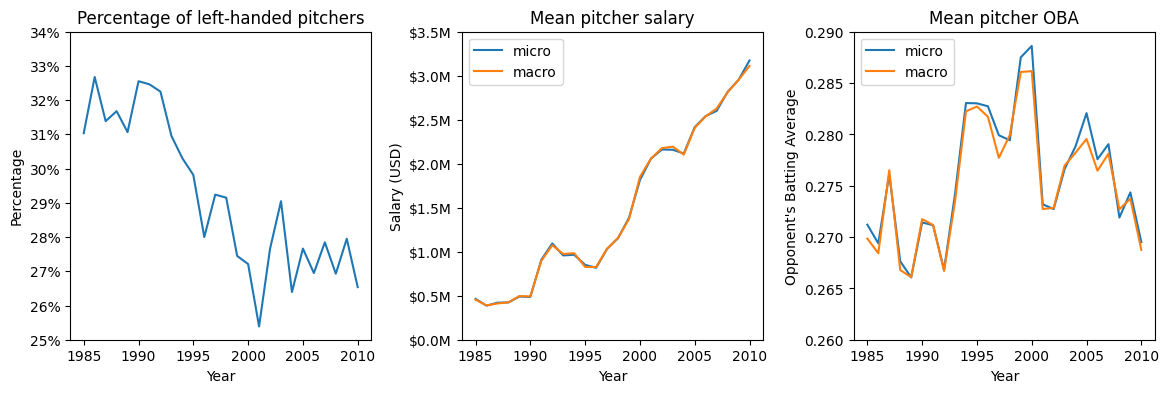

In [75]:
# Create three-panel plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)
#fig.suptitle('Horizontally stacked subplots')
fig.set_size_inches(w=14, h=4)
fig.subplots_adjust(wspace=0.3)

# Plot percentage of left-handed pitchers
ax1.plot(percent_left_players)
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title("Percentage of left-handed pitchers")
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["{:.0f}%".format(p) for p in ax1.get_yticks()])

# Plot mean pitcher salary
ax2.plot(micro_avg_salary, label="micro"); ax2.plot(macro_avg_salary, label="macro")
ax2.set_xlabel('Year')
ax2.set_ylabel('Salary (USD)')
ax2.legend(loc='upper left')
ax2.set_title("Mean pitcher salary")
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["${:.1f}".format(p/1e6)+'M' for p in ax2.get_yticks()])

# Plot mean pitcher opponent's batting average
ax3.plot(micro_avg_baopp, label="micro"); ax3.plot(macro_avg_baopp, label="macro")
ax3.set_xlabel('Year')
ax3.set_ylabel('Opponent\'s Batting Average')
ax3.legend(loc='upper left')
ax3.set_title("Mean pitcher OBA")
ax3.set_yticks(ticks=ax3.get_yticks(), labels=["{:.3f}".format(p) for p in ax3.get_yticks()])
plt.show()

In [76]:
year = 2007
print("{:d}:\tPercentage of left-handed pitchers: {:.2f}%\n\tAverage salary: ${:.2f}\n\tAverage opponents' batting average: {:.4f}"
      .format(year, percent_left_players[year], micro_avg_salary[year], micro_avg_baopp[year]))

2007:	Percentage of left-handed pitchers: 27.85%
	Average salary: $2600513.74
	Average opponents' batting average: 0.2790


**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

In [77]:
def agg_list_values_per_year(df, column, dropnan=True):
    """
        Takes a Pandas Dataframe with a 'yearID' and aggregates the
        values into lists.

        Returns a map year -> value list.
    """
    aggmap = df.groupby('yearID')[column].aggregate(list).to_dict()
    return {key : ([v for v in val if ~np.isnan(v)] if dropnan else val) for key, val in aggmap.items()}

def double_singletons(jagged):
    """
        Takes a map key->list and doubles the length
        of singleton values. 

        Example: [[1, 2, 3], [1]] => [[1, 2, 3], [1, 1]]
        
        Returns a map key -> list.
    """
    return {key:val if len(val)>1 else val * 2 for key, val in jagged.items()}

def bootstrap_stat_with_cis(data, statistic, level):
    """
        Takes a jagged list of non-empty lists and computes
        the percentile bootstrap estimation of the statistic, with
        two-sided confidence intervals at the given level.

        Returns a map year -> (stat, confidence interval (float)).
    """
    bootstrap_args = {'statistic':statistic, 'confidence_level':level, 
                      'alternative':'two-sided', 'method':'percentile'}
    
    # scipy.stats.bootstrap won't accept singletons
    double_data = double_singletons(data)

    # get confidence interval objects
    cis = {key:bootstrap((val, ), n_resamples=len(val), **bootstrap_args) for key, val in double_data.items()}

    # Return key = year; value = (estimate, low, high)
    return {key:(np.mean(val.bootstrap_distribution), val.confidence_interval.low, val.confidence_interval.high) for key, val in cis.items()}

def compute_yearly_avg_stat_with_cis(data, column, statistic, level, dropnan=True):
    """
        Takes a pandas DataFrame and computes the statistic on
        the column values grouped by 'yearID' with confidence intervals
        computed by a bootstrapping procedure at the given level.

        Returns a pandas DataFrame year -> (stat, confidence interval (float))
    """
    # Aggregate values into a list per year
    column_vals_per_year = agg_list_values_per_year(data, column, dropnan)

    # Compute the statistic with confidence intervals
    estimation_map = bootstrap_stat_with_cis(column_vals_per_year, statistic, level)

    # Returns a pandas DataFram with the required statistic and confidence intervals
    avg_stat_df = pd.DataFrame.from_dict(estimation_map, orient='index', columns=[statistic.__name__, 'low', 'high'])
    
    return avg_stat_df 


In [78]:
# Compute yearly mean salary with 0.95 confidence intervals
salary_compute_args = {'column':'salary', 'statistic':np.mean, 'level':0.95}
l_sal_yearly_means_cis = compute_yearly_avg_stat_with_cis(df[~throw_r], **salary_compute_args)
r_sal_yearly_means_cis = compute_yearly_avg_stat_with_cis(df[throw_r], **salary_compute_args)

# Compute yearly mean opponent's batting average with 0.95 confidence intervals
baopp_compute_args = {'column':'BAOpp', 'statistic':np.mean, 'level':0.95}
l_baopp_yearly_means_cis = compute_yearly_avg_stat_with_cis(df[~throw_r], **baopp_compute_args)
r_baopp_yearly_means_cis = compute_yearly_avg_stat_with_cis(df[throw_r], **baopp_compute_args)

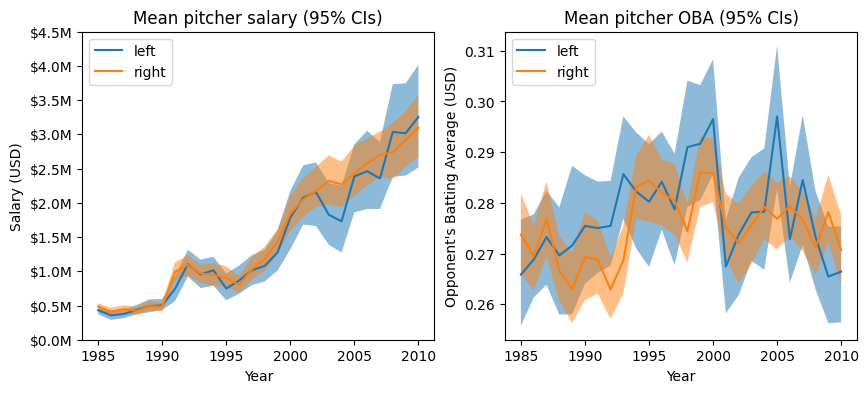

In [79]:
def plot_with_confidence(data, column, label, axis):
    """
        Takes a pandas DataFrame and plots its column, as well as confidence
        intervals represented by columns 'high' and 'low' using fill_between,
        and plots on given axis.
    """
    axis.plot(data[column], label=label)
    axis.fill_between(x=data.index, y1=data['high'], y2=data['low'], alpha=0.5)

# Create three-panel plot
fig, axs = plt.subplots(1, 2, sharex=True)
fig.set_size_inches(w=10, h=4)
#fig.subplots_adjust(wspace=00)
ax1, ax2 = axs

# Plot left-right hand mean pitcher salaries with confidence intervals
ax1.set_title(f"Mean pitcher salary (95% CIs)")
ax1.set_ylabel("Salary (USD)")
plot_with_confidence(l_sal_yearly_means_cis, 'mean', 'left', ax1)
plot_with_confidence(r_sal_yearly_means_cis, 'mean', 'right', ax1)
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["${:.1f}".format(p/1e6)+'M' for p in ax1.get_yticks()])

# Plot left-right hand mean pitcher baopps with confidence intervals
ax2.set_title(f"Mean pitcher OBA (95% CIs)")
ax2.set_ylabel("Opponent\'s Batting Average (USD)")
plot_with_confidence(l_baopp_yearly_means_cis, 'mean', 'left', ax2)
plot_with_confidence(r_baopp_yearly_means_cis, 'mean', 'right', ax2)

# Set common plot settings
for ax in axs:
    ax.set_xlabel('Year')
    ax.legend(loc='upper left')

plt.show()

In [80]:
year = 1985
print("{:d}:\tAverage salary of left-handed pitchers: ${:.2f}\n\tOpponent's batting average of right-handed pitchers {:.4f}"
      .format(year, l_sal_yearly_means_cis.loc[year]['mean'], r_baopp_yearly_means_cis.loc[year]['mean']))

1985:	Average salary of left-handed pitchers: $431272.98
	Opponent's batting average of right-handed pitchers 0.2737


**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


In [396]:
def percent_nans(arr):
    """
        Computes the percentage of NaNs in the array-like a.

        Returns float in [0..1].
    """
    return sum([1 for a in arr if np.isnan(a)]) / len(arr)

In [397]:
# Compute yearly mean missing salary data with 0.95 confidence intervals
missing_compute_args = {'column':'salary', 'statistic':percent_nans, 'level':0.95, 'dropnan':False}
l_miss_yearly_means_cis = compute_yearly_avg_stat_with_cis(df[~throw_r], **missing_compute_args)
r_miss_yearly_means_cis = compute_yearly_avg_stat_with_cis(df[throw_r], **missing_compute_args)

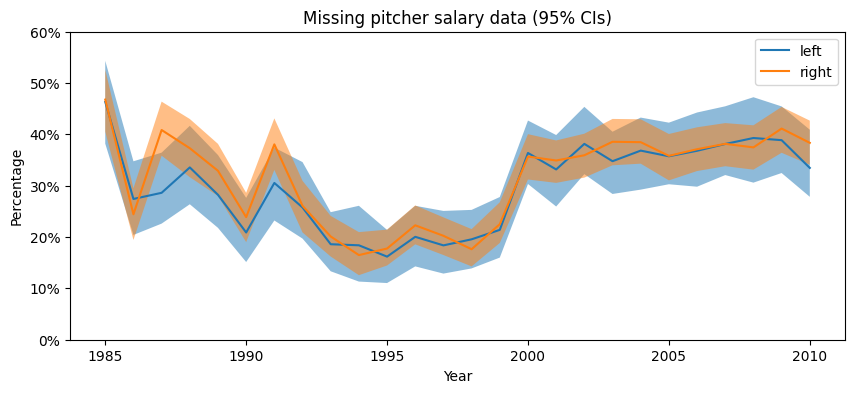

In [408]:
# Plot left-right hand mean pitcher missing salary data with confidence intervals
fig, ax = plt.subplots(1)
fig.set_size_inches(w=10, h=4)
ax.set_title(f"Missing pitcher salary data (95% CIs)")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
plot_with_confidence(l_miss_yearly_means_cis, 'percent_nans', 'left', ax)
plot_with_confidence(r_miss_yearly_means_cis, 'percent_nans', 'right', ax)
ax.set_yticks(ticks=ax.get_yticks(), labels=["{:.0f}%".format(p*100) for p in ax.get_yticks()])
ax.legend(loc='upper right')
plt.show()

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?